In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("Language Detection.csv")
print(data.head())

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English


In [27]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [28]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

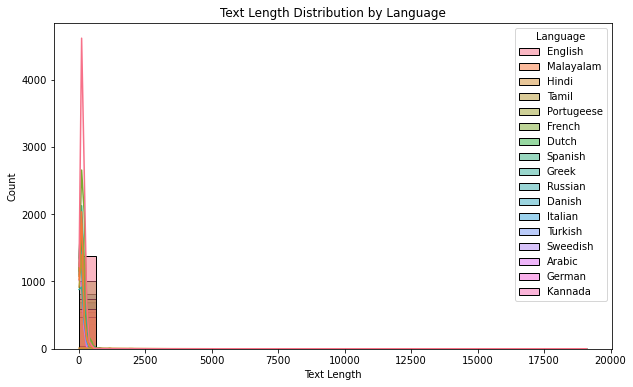

Most common words:
de: 3428
a: 1722
en: 1395
the: 1368
la: 1316
que: 1259
of: 1127
in: 1071
and: 836
du: 782


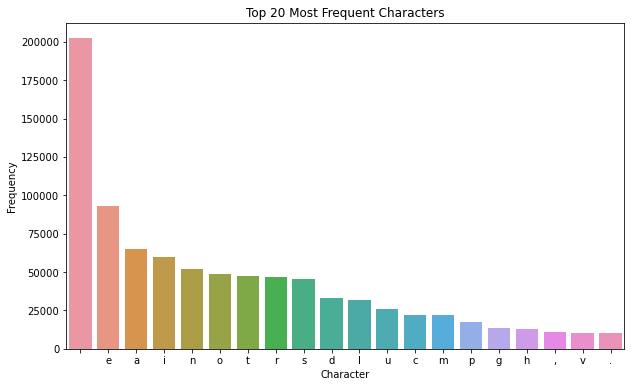

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Text Length Distribution
data['Text Length'] = data['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Text Length', hue='Language', bins=30, kde=True)
plt.title('Text Length Distribution by Language')
plt.show()

# Word Frequency Analysis
from collections import Counter

# Combine all texts for analysis
all_text = " ".join(data['Text'])

# Tokenize text (split into words)
words = all_text.split()

# Count word frequencies
word_freq = Counter(words)

# Print the most common words
print("Most common words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

# Character Distribution
all_characters = " ".join(" ".join(data['Text']).split())

# Count character frequencies
char_freq = Counter(all_characters)

# Plot character frequencies
char_freq_df = pd.DataFrame.from_dict(char_freq, orient='index').reset_index()
char_freq_df.columns = ['Character', 'Frequency']
char_freq_df = char_freq_df.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=char_freq_df.head(20), x='Character', y='Frequency')
plt.title('Top 20 Most Frequent Characters')
plt.show()


In [58]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Data Splitting
x = data["Text"]
y = data["Language"]

# Create CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Perform cross-validation for evaluation
# You can change the number of folds (e.g., cv=5) as needed
cross_val_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", cross_val_scores.mean())


Cross-validation scores: [0.98355899 0.99226306 0.99419729 0.99032882 0.98742747 0.98065764
 0.96518375 0.94191675 0.95159729 0.97967086]
Mean accuracy: 0.9766801919630904


In [61]:
from sklearn.preprocessing import LabelEncoder

# Define a maximum text length for padding or truncation
max_text_length = 100  # Adjust as needed

# Ensure all texts have a consistent length by padding or truncating
x = [text[:max_text_length] if len(text) > max_text_length else text.ljust(max_text_length) for text in x]

# Create a label encoder to encode language labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Example: Language detection for a short text
user_input = "Bonjour"
user_input = user_input[:max_text_length] if len(user_input) > max_text_length else user_input.ljust(max_text_length)
user_input_encoded = cv.transform([user_input]).toarray()
predicted_language_encoded = model.predict(user_input_encoded)
predicted_language = label_encoder.inverse_transform(predicted_language_encoded)
print("Predicted Language:", predicted_language[0])


Predicted Language: French


In [63]:
import re

# Data Cleaning
data.dropna(inplace=True)  # Remove rows with missing values
data.drop_duplicates(inplace=True)  # Remove duplicate rows

# Text Preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters and digits using regular expressions
    text = re.sub(r'[^a-z\s]', '', text)
    
    return text

# Apply text preprocessing to the "Text" column
data['Text'] = data['Text'].apply(preprocess_text)

# Model Evaluation
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.0


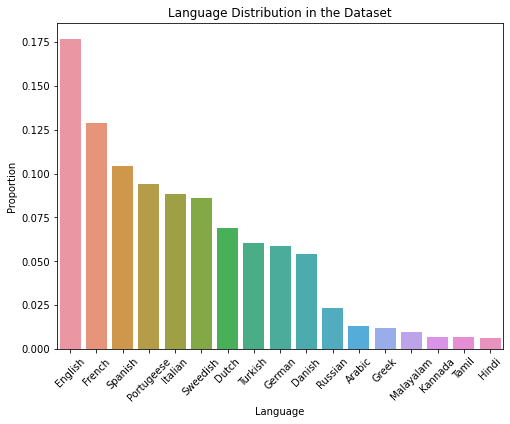

In [64]:
# Bias Analysis
# Calculate the distribution of languages in the dataset
language_distribution = data['Language'].value_counts(normalize=True)

# Plot the distribution of languages
plt.figure(figsize=(8, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values)
plt.title('Language Distribution in the Dataset')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


In [65]:
# Noise Analysis
# Check for empty or very short text samples
data['Text_Length'] = data['Text'].apply(len)
short_text_threshold = 10  # Adjust as needed
noise_short_texts = data[data['Text_Length'] < short_text_threshold]

# Check for text samples with very long lengths
long_text_threshold = 1000  # Adjust as needed
noise_long_texts = data[data['Text_Length'] > long_text_threshold]

# Display the noisy short and long text samples
print("Noisy Short Texts (length <", short_text_threshold, "):")
print(noise_short_texts[['Text', 'Language']])

print("\nNoisy Long Texts (length >", long_text_threshold, "):")
print(noise_long_texts[['Text', 'Language']])


Noisy Short Texts (length < 10 ):
            Text Language
347      kennedy  English
750          gne  English
1125    its fine  English
1133    im sorry  English
1138   oh my god  English
...          ...      ...
10012             Kannada
10019             Kannada
10025             Kannada
10040             Kannada
10043             Kannada

[248 rows x 2 columns]

Noisy Long Texts (length > 1000 ):
                                                   Text    Language
1979         \n       \n      \n     \n        \n   ...       Hindi
1997                                   \n           ...       Hindi
2041                                                ...       Hindi
2889   o mediawiki tem documentao sobre wikipdia ing...  Portugeese
3858  ces programmes selon leur degr de perfectionne...      French


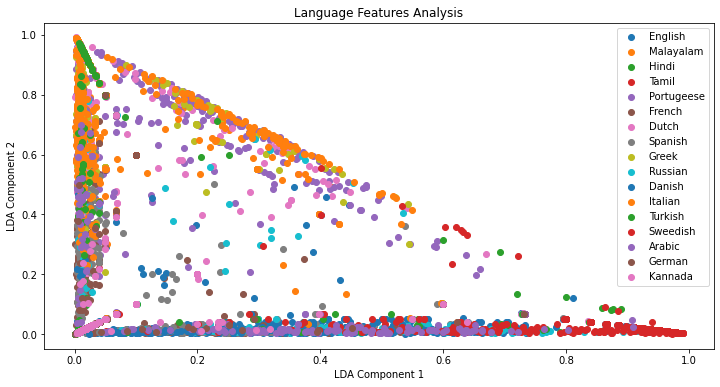

In [2]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply Latent Dirichlet Allocation (LDA) for feature analysis
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # You can adjust the number of components
X_lda = lda.fit_transform(X)

# Visualize language features using LDA components
plt.figure(figsize=(12, 6))
for language in data['Language'].unique():
    plt.scatter(X_lda[y == language][:, 0], X_lda[y == language][:, 1], label=language)

plt.title('Language Features Analysis')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend()
plt.show()


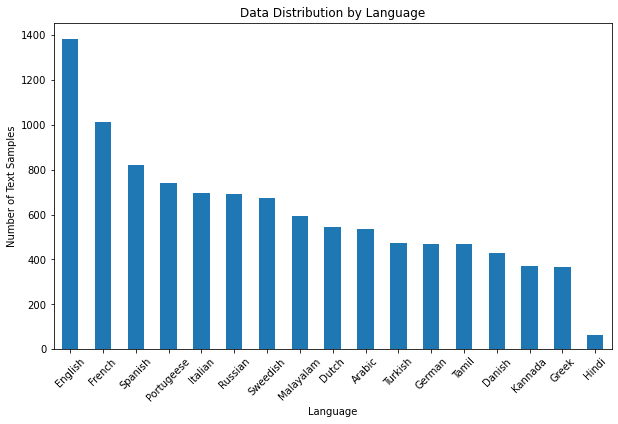

In [8]:
# Data Distribution Analysis
language_distribution = data['Language'].value_counts()

# Plot the distribution of languages
plt.figure(figsize=(10, 6))
language_distribution.plot(kind='bar')
plt.title('Data Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Text Samples')
plt.xticks(rotation=45)
plt.show()


In [4]:
x = data["Text"]
y = data["Language"]

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.977725674091442


In [3]:
import tkinter as tk
from tkinter import messagebox

# Import the necessary libraries and code for language detection
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
data = pd.read_csv("Language Detection.csv")

# Create the CountVectorizer and train the MultinomialNB model (as shown in your previous code)
x = np.array(data["Text"])
y = np.array(data["Language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
model = MultinomialNB()
model.fit(X, y)

# Function to perform language detection
def detect_language():
    user_input = text_entry.get(1.0, tk.END)
    data = cv.transform([user_input]).toarray()
    predicted_language = model.predict(data)
    language_result.config(text=f"The language is: {predicted_language[0]}")

# Create the GUI window
root = tk.Tk()
root.title("Language Detection")

# Create a label for user input
input_label = tk.Label(root, text="Enter a text:")
input_label.pack()

# Create a text widget for user input (a larger input box)
text_entry = tk.Text(root, height=20, width=100)
text_entry.pack()

# Create a button to detect language
detect_button = tk.Button(root, text="Detect Language", command=detect_language)
detect_button.pack()

# Create a label to display the language result
language_result = tk.Label(root, text="", wraplength=400)
language_result.pack()

# Run the GUI main loop
root.mainloop()
